In [1]:
import cv2
import pytesseract
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as pplt
from pytesseract import Output

ImportError: cannot import name 'filter' from 'skimage' (/home/cwhyse/BloomProj/scribble-stadium-ds/scribble/lib/python3.8/site-packages/skimage/__init__.py)

In [2]:
image = cv2.imread('/home/cwhyse/BloomProj/scribble-stadium-ds/data_management/autopreprocess_testing/data/Photo 3130 .jpg')
d = pytesseract.image_to_data(image, output_type=Output.DICT)

In [3]:
# d["text"]

In [4]:
# get grayscale image
def get_grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# noise removal
def remove_noise(image):
    return cv2.medianBlur(image,5)
 
#thresholding
def thresholding(image):
    return cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

#dilation
def dilate(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.dilate(image, kernel, iterations = 1)
    
#erosion
def erode(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.erode(image, kernel, iterations = 1)

#opening - erosion followed by dilation
def opening(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)

#canny edge detection
def canny(image):
    return cv2.Canny(image, 100, 200)

#skew correction
def deskew(image):
    coords = np.column_stack(np.where(image > 0))
    angle = cv2.minAreaRect(coords)[-1]
    if angle < -45:
        angle = -(90 + angle)
    else:
        angle = -angle
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(image, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
    return rotated

#template matching
def match_template(image, template):
    return cv2.matchTemplate(image, template, cv2.TM_CCOEFF_NORMED) 

# wrapping individual words
def bounding_boxes(image):
    n_boxes = len(d['text'])
    for i in range(n_boxes):
        if int(d['conf'][i]) > 60:
            (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
            img = cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)
    return img

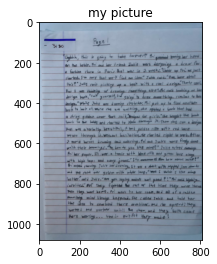

In [5]:
opened = opening(image)

pplt.imshow(opened)
pplt.title('my picture')
pplt.show()

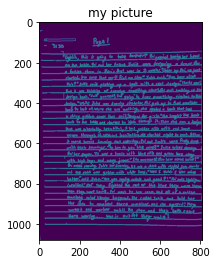

In [6]:
canny = canny(image)

pplt.imshow(canny)
pplt.title('my picture')
pplt.show()

In [7]:
canny.shape

(1080, 810)

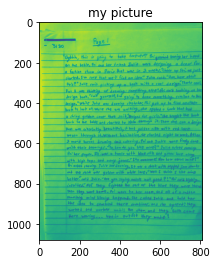

In [8]:
# img = cv2.imread(image)
image = cv2.imread('/home/cwhyse/BloomProj/scribble-stadium-ds/data_management/autopreprocess_testing/data/Photo 3130 .jpg')
gray = get_grayscale(image)

pplt.imshow(gray)
pplt.title('my picture')
pplt.show()

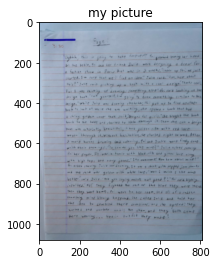

In [9]:
clean = remove_noise(image)

pplt.imshow(clean)
pplt.title('my picture')
pplt.show()

In [10]:
# thresh = thresholding(opened)

# pplt.imshow(thresh)
# pplt.title('my picture')
# pplt.show()

In [11]:
# dilate = dilate(opened)

# pplt.imshow(dilate)
# pplt.title('my picture')
# pplt.show()

In [12]:
# match = match_template(opened)

# pplt.imshow(match)
# pplt.title('my picture')
# pplt.show()

In [13]:
# bounding_boxes(opened)

# pplt.imshow(opened)
# # pplt.title('my picture')
# pplt.show()

In [14]:
# deskew = deskew(image)

# pplt.imshow(deskew)
# pplt.title('my picture')
# pplt.show()

In [15]:
# import numpy as np
# from scipy.misc import imshow, imsave, imread 
imggray = np.mean(image, -1)
imfft = np.fft.fft2(imggray)
mags = np.abs(np.fft.fftshift(imfft))
angles = np.angle(np.fft.fftshift(imfft))
visual = np.log(mags)
visual2 = (visual - visual.min()) / (visual.max() - visual.min())*255

In [16]:
# 
mask = image[:,:,:3]
mask = (np.mean(mask,-1) > 20)
visual2[mask] = np.mean(visual)

In [17]:
# !pip install opencv-contrib-python

In [18]:
newmagsshift = np.exp(visual)
newffts = newmagsshift * np.exp(1j*angles)
newfft = np.fft.ifftshift(newffts)
imrev = np.fft.ifft2(newfft)
newim2 = 255 - np.abs(imrev).astype(np.uint8)

In [19]:
# pplt.imshow(newim2)
# pplt.show()

In [20]:
newim2.shape

(1080, 810)

In [21]:
# # cannyPlus = canny(newim2)
# openedPlus = opening(newim2)
# cleanPlus = remove_noise(newim2)

In [22]:
cv2.imwrite("/home/cwhyse/BloomProj/scribble-stadium-ds/data_management/autopreprocess_testing/data/transformedData/Photo 3130 (fourier).jpg",  newim2)

True